In [29]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = pd.read_csv('data/atepc_result.csv')
data.head(10)

,sentence,IOB,tokens,aspect,position,sentiment,probs,confidence
0,So far so good ! Purchased my first few items ...,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","['So', 'far', 'so', 'good', '!', 'Purchased', ...",['experience'],[[11]],['Positive'],"[[0.0004006033996120095, 0.0002383922692388296...",[0.9994]
1,Shoppee seller does not honour time sale after...,"['O', 'B-ASP', 'O', 'O', 'O', 'O', 'O', 'O', '...","['Shoppee', 'seller', 'does', 'not', 'honour',...","['seller', 'paid']","[[1], [9]]","['Negative', 'Negative']","[[0.9985483288764954, 0.0009869406931102276, 0...","[0.9985, 0.9974]"
2,Saw the 1 time free gift for New users . When ...,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","['Saw', 'the', '1', 'time', 'free', 'gift', 'f...",['reply'],[[108]],['Negative'],"[[0.9987223744392395, 0.0009270187001675367, 0...",[0.9987]
3,Bad service,"['O', 'B-ASP']","['Bad', 'service']",['service'],[[1]],['Negative'],"[[0.9920046925544739, 0.00429740222170949, 0.0...",[0.992]
4,"After selecting the item , buyer should be abl...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","['After', 'selecting', 'the', 'item', ',', 'bu...",['image'],[[14]],['Negative'],"[[0.9953409433364868, 0.004125675186514854, 0....",[0.9953]
5,I love that we have option to select zero ship...,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","['I', 'love', 'that', 'we', 'have', 'option', ...",['shipping'],[[9]],['Positive'],"[[0.011489118449389935, 0.0005119239212945104,...",[0.988]
6,Seller POV - I had listings disappearing sudde...,"['O', 'O', 'O', 'O', 'O', 'B-ASP', 'O', 'O', '...","['Seller', 'POV', '-', 'I', 'had', 'listings',...",['listings'],[[5]],['Negative'],"[[0.997421383857727, 0.0020058145746588707, 0....",[0.9974]
7,Good,['O'],['Good'],[],[],[],[],[]
8,Great app,"['O', 'B-ASP']","['Great', 'app']",['app'],[[1]],['Positive'],"[[0.16775378584861755, 0.0004008350952062756, ...",[0.8318]
9,Good deals but oh so addictive . . might need ...,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","['Good', 'deals', 'but', 'oh', 'so', 'addictiv...",['app'],[[13]],['Negative'],"[[0.8191395401954651, 0.16894292831420898, 0.0...",[0.8191]


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentence    1500 non-null   object
 1   IOB         1500 non-null   object
 2   tokens      1500 non-null   object
 3   aspect      1500 non-null   object
 4   position    1500 non-null   object
 5   sentiment   1500 non-null   object
 6   probs       1500 non-null   object
 7   confidence  1500 non-null   object
dtypes: object(8)
memory usage: 93.9+ KB


In [4]:
# the only columns we are interested in are apsect_term, sentiment and confidence

data = data[['aspect', 'sentiment', 'confidence']]

In [5]:
len(data['aspect'] == '[]')


1500

In [6]:
# we drop the ones with no aspects terms
data = data[data['aspect'] != '[]']
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1082 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   aspect      1082 non-null   object
 1   sentiment   1082 non-null   object
 2   confidence  1082 non-null   object
dtypes: object(3)
memory usage: 33.8+ KB


In [7]:
# cleaning the data

data.loc[:, 'aspect'] = data['aspect'].str.replace('[', '')
data.loc[:, 'aspect'] = data['aspect'].str.replace(']', '')
data.loc[:, 'aspect'] = data['aspect'].str.replace("'", '')

data.loc[:, 'sentiment'] = data['sentiment'].str.replace('[', '')
data.loc[:, 'sentiment'] = data['sentiment'].str.replace(']', '')
data.loc[:, 'sentiment'] = data['sentiment'].str.replace("'", '')

data.loc[:, 'confidence'] = data['confidence'].str.replace('[', '')
data.loc[:, 'confidence'] = data['confidence'].str.replace(']', '')
data.loc[:, 'confidence'] = data['confidence'].str.replace("'", '')


data.head(10)

,aspect,sentiment,confidence
0,experience,Positive,0.9994
1,"seller, paid","Negative, Negative","0.9985, 0.9974"
2,reply,Negative,0.9987
3,service,Negative,0.992
4,image,Negative,0.9953
5,shipping,Positive,0.988
6,listings,Negative,0.9974
8,app,Positive,0.8318
9,app,Negative,0.8191
10,ads,Negative,0.9991


In [8]:
aspect_df = data['aspect'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
sentiment_df = data['sentiment'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).str.strip()
confidence_df = data['confidence'].astype(str).str.split(',', expand=True).stack().reset_index(level=1, drop=True)

# Join the separate dataframes back together to create the final dataframe
final_data = pd.DataFrame({
    'aspect': aspect_df,
    'sentiment': sentiment_df,
    'confidence': confidence_df
})

# Convert confidence column back to float type
final_data['confidence'] = final_data['confidence'].astype(float)

data = final_data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aspect      1307 non-null   object 
 1   sentiment   1307 non-null   object 
 2   confidence  1307 non-null   float64
dtypes: float64(1), object(2)
memory usage: 40.8+ KB


In [9]:
unique_aspects = data['aspect'].unique()
len(unique_aspects)
# data needs to be cleaned 

445

## Visualising Results

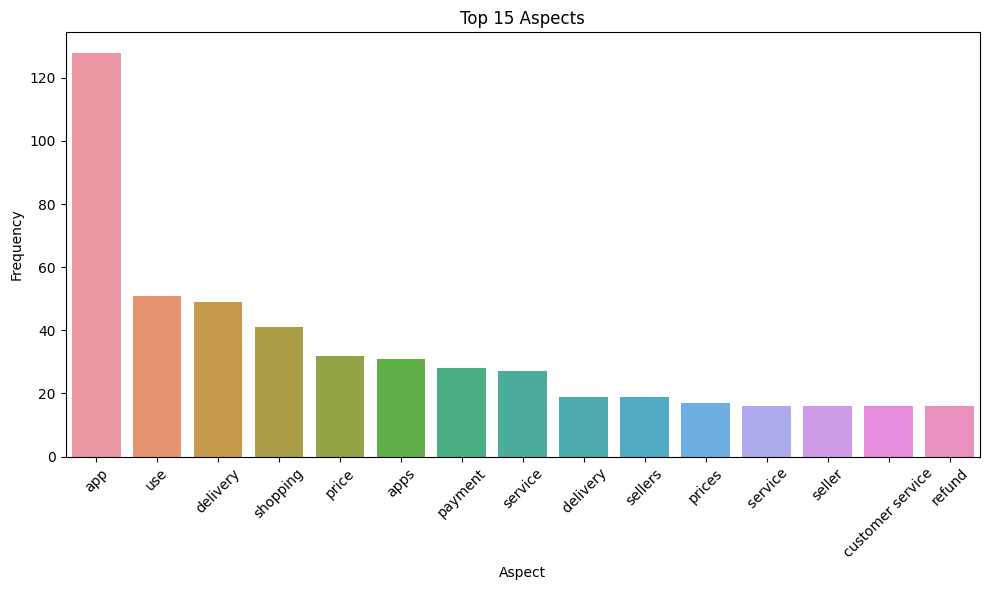

In [24]:
aspect_counts = data['aspect'].value_counts()

# Select the top N aspects to display (optional)
N = 15
top_aspects = aspect_counts.head(N)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_aspects.index, y=top_aspects.values)
plt.xlabel('Aspect')
plt.ylabel('Frequency')
plt.title(f'Top {N} Aspects')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

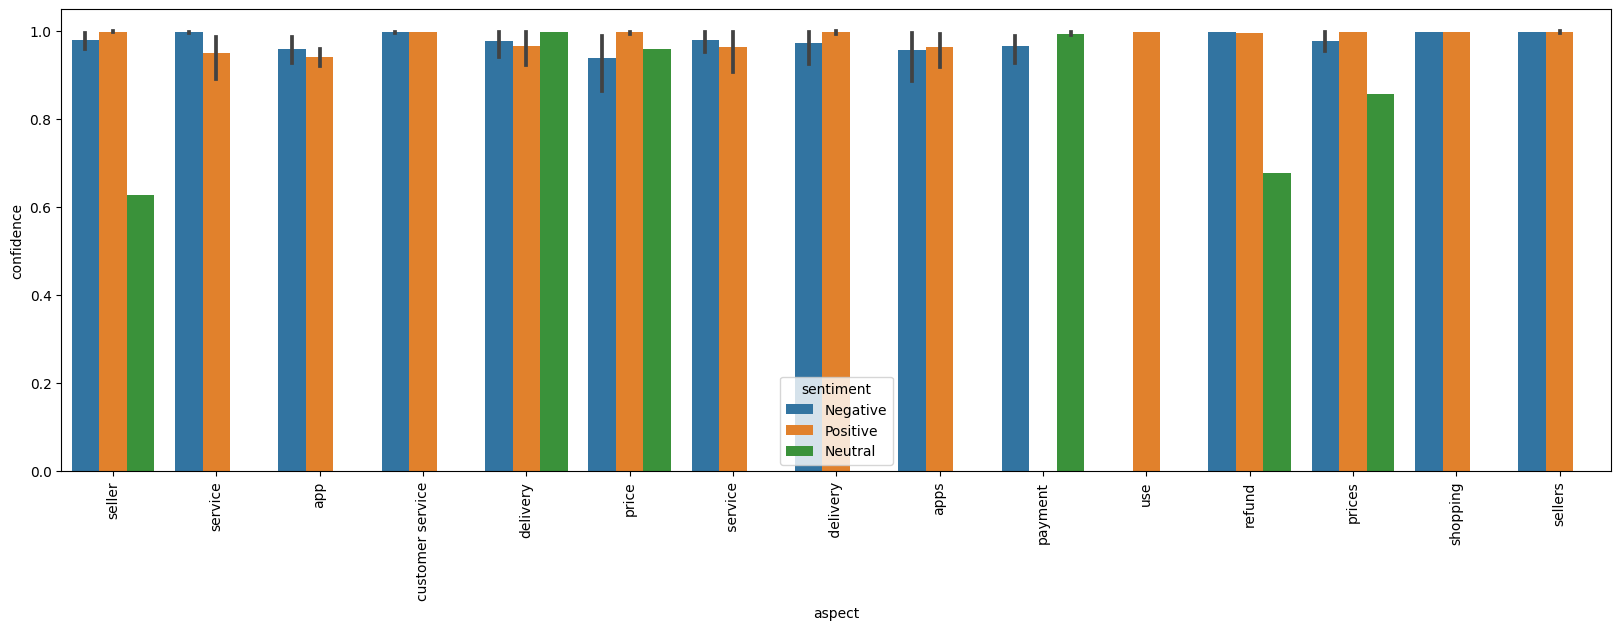

In [27]:
aspect_sentiment_counts = data.groupby(
    ['aspect', 'sentiment']).size().unstack()
aspect_sentiment_counts

filtered_data = data[data['aspect'].isin(top_aspects.index)]
filtered_data
# Plotting the grouped bar chart using seaborn
# color_dict = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

fig, ax = plt.subplots(figsize=(20, 6))


# plot the data
sns.barplot(data=filtered_data, x='aspect', y='confidence',
            hue='sentiment', ax=ax)

# rotate x labels for better visibility if there are many aspects
plt.xticks(rotation=90)

plt.show()

In [32]:

# pivot the data to create a matrix-like format
pivot_df = filtered_data.pivot_table(values='confidence', index='aspect', columns='sentiment', aggfunc=np.mean)
pivot_df

sentiment,Negative,Neutral,Positive
aspect,,,
delivery,0.973386,NaN,0.997617
service,0.980290,NaN,0.964267
app,0.960367,NaN,0.941419
apps,0.957640,NaN,0.963243
customer service,0.998421,NaN,0.999400
delivery,0.977724,0.998000,0.966607
payment,0.965632,0.993467,NaN
price,0.940214,0.959800,0.997229
prices,0.977775,0.858500,0.998983


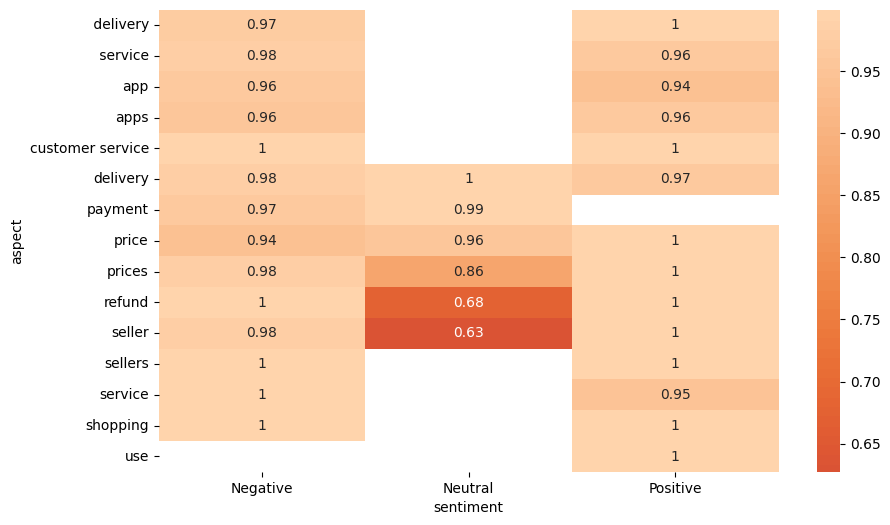

In [34]:

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(pivot_df, annot=True, center=0.0, ax=ax)

plt.show()

/var/folders/3_/1h_p1jg52g91lqypqw52zy440000gn/T/ipykernel_4915/3186994056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['color'] = filtered_data['sentiment'].map(color_dict)


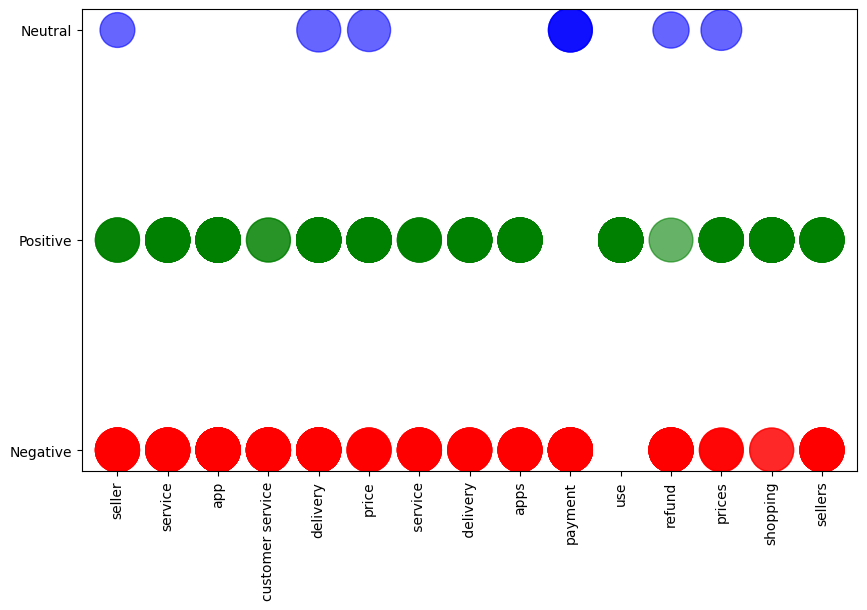

In [36]:
# create a color mapping for sentiments
color_dict = {'Positive': 'green', 'Negative': 'red' , 'Neutral': 'blue'}

# map sentiments to colors in the DataFrame
filtered_data['color'] = filtered_data['sentiment'].map(color_dict)

fig, ax = plt.subplots(figsize=(10, 6))

# plot the data
# you can adjust the multiplier on 'confidence' in s to get an appropriate size for your bubbles
scatter = ax.scatter(filtered_data['aspect'], filtered_data['sentiment'], s=filtered_data['confidence']*1000, c=filtered_data['color'], alpha=0.6)

# rotate x labels for better visibility
plt.xticks(rotation=90)

plt.show()